In [1]:
import os
import sys
def getRepoPath():
    cwd = os.getcwd()
    delimiter = "\\" if "\\" in cwd else "/"
    repoPath = delimiter.join(cwd.split(delimiter)[:cwd.split(delimiter).index("dataImport")]) + delimiter
    return repoPath
repoPath = getRepoPath()
sys.path.append(repoPath + 'dataImport/')
from utils import workingDataPath, getWorkingHRDfParquet, getHRIntervals, intervalOverlap, getHRsForTimePeriods, graphMultiHRDate, graphHypnoandHRDate
import pandas as pd
from datetime import date, time, timedelta

In [2]:
appleHRDf = getWorkingHRDfParquet('apple')
print(len(appleHRDf))
appleIntervals = getHRIntervals(appleHRDf, 11)
print(len(appleIntervals))
appleIntervals.head()

567895
673


,startTime,endTime,value
229,2021-07-20 13:02:31-07:00,2021-07-20 13:10:31-07:00,1
6837,2021-08-15 14:16:48-07:00,2021-08-15 14:22:19-07:00,1
7762,2021-08-18 21:01:52-07:00,2021-08-18 21:09:51-07:00,1
20198,2021-10-14 15:32:01-07:00,2021-10-14 15:38:49-07:00,1
37864,2022-01-07 17:17:48-07:00,2022-01-07 17:22:53-07:00,1


In [3]:
sorted(list(set(appleHRDf.index.date)))[-10:]

[datetime.date(2024, 9, 8),
 datetime.date(2024, 9, 9),
 datetime.date(2024, 9, 10),
 datetime.date(2024, 9, 11),
 datetime.date(2024, 9, 12),
 datetime.date(2024, 9, 13),
 datetime.date(2024, 9, 14),
 datetime.date(2024, 9, 15),
 datetime.date(2024, 9, 16),
 datetime.date(2024, 9, 17)]

In [4]:
fitbitHRDf = getWorkingHRDfParquet('fitbit')
print(len(fitbitHRDf))
fitbitIntervals = getHRIntervals(fitbitHRDf, 11)
print(len(fitbitIntervals))
fitbitIntervals.head()

16052785
4906


,startTime,endTime,value
1811,2020-05-14 08:06:20-07:00,2020-05-14 08:11:45-07:00,1
2016,2020-05-14 11:13:50-07:00,2020-05-14 11:19:59-07:00,1
2374,2020-05-14 16:18:52-07:00,2020-05-14 16:26:07-07:00,1
2432,2020-05-14 17:39:22-07:00,2020-05-14 17:44:37-07:00,1
3442,2020-05-15 05:47:40-07:00,2020-05-15 05:54:08-07:00,1


In [31]:
# pick a day 
# get all HR's for that day
# calculate intervals
# graph intervals
from datetime import date
import matplotlib.pyplot as plt

day = date(2021,8,10)


dayHRs = appleHRDf#[appleHRDf.index.date == day].copy()
dayHRs['interval'] = (dayHRs.index.to_series().diff()).dt.total_seconds()
dayHRs['intervalS'] = dayHRs['interval'].shift(1)
dayHRs = dayHRs[dayHRs['interval'] > 10].copy()
dayHRs = dayHRs[dayHRs['intervalS'] > 10].copy()
# dayHRs = dayHRs.dropna()
dayHRs

,value,interval,intervalS
sampleDT,,,
2021-07-19 19:59:58-07:00,105.0,74.0,39.0
2021-07-19 20:13:36-07:00,68.0,191.0,382.0
2021-07-19 20:20:41-07:00,60.0,425.0,191.0
2021-07-19 20:25:45-07:00,59.0,304.0,425.0
2021-07-19 20:28:30-07:00,58.0,165.0,304.0
...,...,...,...
2024-09-16 10:06:55-07:00,66.0,98.0,292.0
2024-09-16 13:49:53-07:00,79.0,16.0,13.0
2024-09-16 20:42:35-07:00,124.0,17.0,12.0


In [23]:
dayHRs['interval'].corr(dayHRs['intervalS'])

0.617187238720849

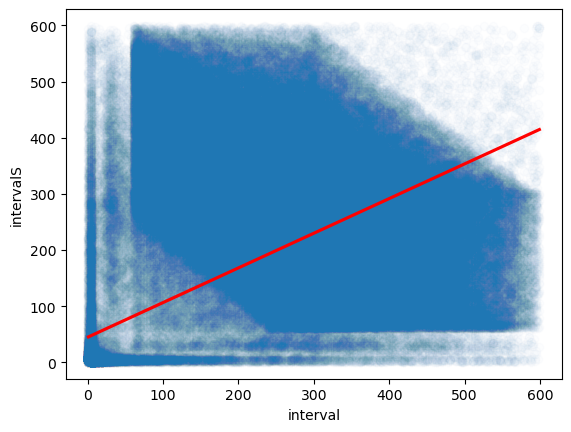

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax = sns.regplot(x=dayHRs['interval'],y=dayHRs['intervalS'], scatter_kws={'alpha': 0.01}, line_kws={'color': 'red'})

In [36]:
dayHRs = appleHRDf#[appleHRDf.index.date == day].copy()
dayHRs['interval'] = (dayHRs.index.to_series().diff()).dt.total_seconds()
dayHRs['intervalS'] = dayHRs['interval'].shift(1)
dayHRs = dayHRs[dayHRs['interval'] < 10].copy()
dayHRs = dayHRs[dayHRs['intervalS'] < 10].copy()
dayHRs['interval'].corr(dayHRs['intervalS'])

-0.47677949017144666

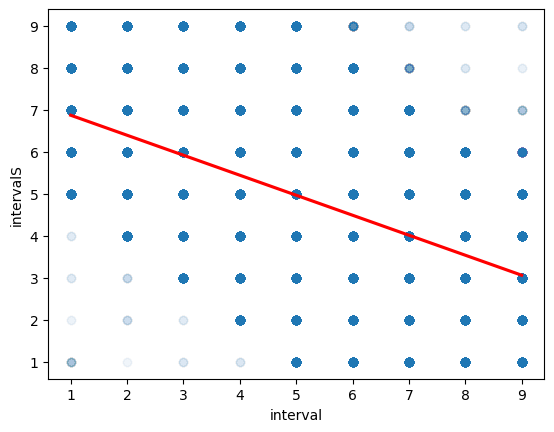

In [37]:
fig, ax = plt.subplots()
ax = sns.regplot(x=dayHRs['interval'],y=dayHRs['intervalS'], scatter_kws={'alpha': 0.01}, line_kws={'color': 'red'})

In [33]:
dayHRs['interval'] = (dayHRs.index.to_series().diff()).dt.total_seconds()
dayHRs['intervalS'] = dayHRs['interval'].shift(1)
dayHRs = dayHRs[(dayHRs['interval'] > 10) & (dayHRs['interval'] < 600)].copy()
dayHRs = dayHRs[(dayHRs['intervalS'] > 10) & (dayHRs['intervalS'] < 600)].copy()
dayHRs['interval'].corr(dayHRs['intervalS'])

-0.30428401165881597

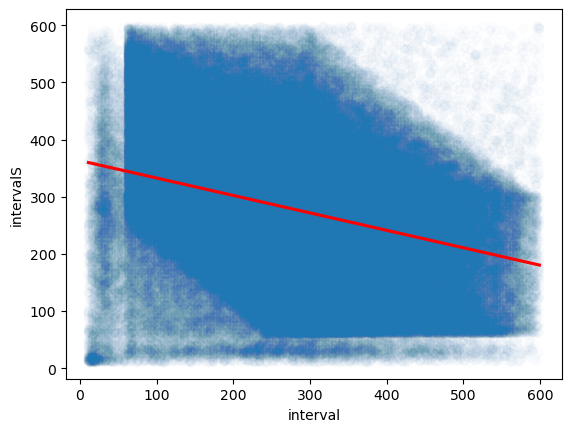

In [32]:
fig, ax = plt.subplots()
ax = sns.regplot(x=dayHRs['interval'],y=dayHRs['intervalS'], scatter_kws={'alpha': 0.01}, line_kws={'color': 'red'})

In [6]:
import numpy as np
from datetime import time
def plotDayIntervals(day, HRDf, maxInterval):
    dayHRs = HRDf[HRDf.index.date == day].copy()
    # dayHRs = dayHRs[dayHRs.index.time < time(0,20,0)].copy()
    dayHRs['interval'] = dayHRs.index.to_series().diff()
    dayHRs = dayHRs.dropna()
    dayHRs = dayHRs[dayHRs['interval'].dt.total_seconds() <= maxInterval]
    if len(dayHRs) > 0:
        fig, ax = plt.subplots(figsize=(20,4))
        toSeconds = np.vectorize(lambda t: t.hour * 3600 + t.minute * 60 + t.second)
        # plt.bar(toSeconds(dayHRs.index.time), dayHRs['interval'], color='skyblue', linewidth = 0.0, width=1, log=False)
        plt.plot(toSeconds(dayHRs.index.time), dayHRs['interval'], marker=".", alpha=.5)
        plt.show()
        # print(dayHRs)


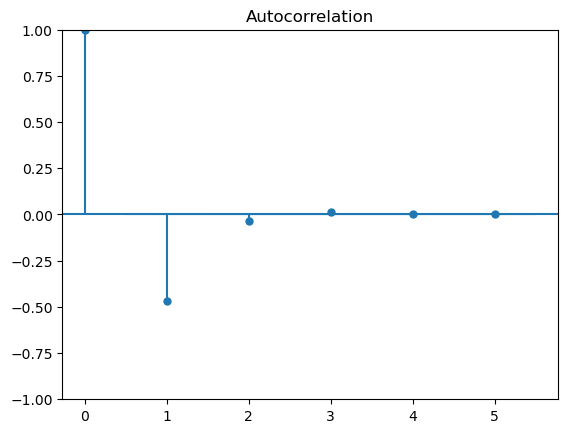

In [39]:
import statsmodels.api as sm
day = date(2021,8,10)
# dayHRs = appleHRDf[appleHRDf.index.month == 1].copy()
# dayHRs = dayHRs[dayHRs.index.time < time(0,20,0)].copy()
# dayHRs['interval'] = dayHRs.index.to_series().diff()
# dayHRs = dayHRs.dropna()

# Plot the autocorrelation function (ACF)
sm.graphics.tsa.plot_acf(dayHRs['interval'].values, lags=5)
plt.show()

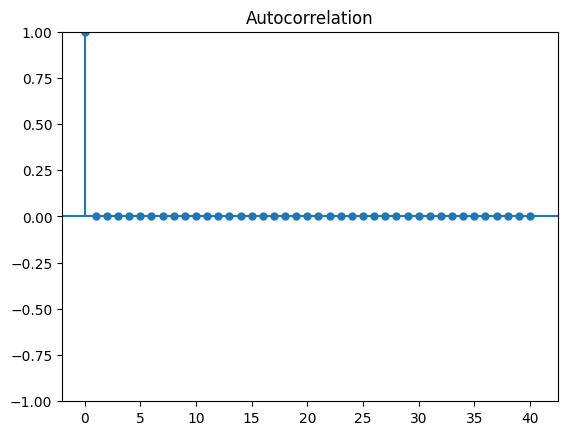

In [16]:
day = date(2024,9,10)
dayHRs = appleHRDf[appleHRDf.index.month == 9].copy()
# dayHRs = dayHRs[dayHRs.index.time < time(0,20,0)].copy()
dayHRs['interval'] = dayHRs.index.to_series().diff()
dayHRs = dayHRs.dropna()

# Plot the autocorrelation function (ACF)
sm.graphics.tsa.plot_acf(dayHRs['interval'].dt.total_seconds().values, lags=40)
plt.show()

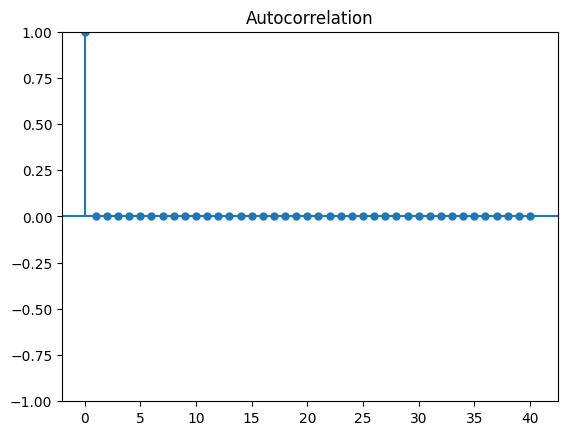

In [17]:
day = date(2021,8,10)
dayHRs = fitbitHRDf[fitbitHRDf.index.month == 1].copy()
# dayHRs = dayHRs[dayHRs.index.time < time(0,20,0)].copy()
dayHRs['interval'] = dayHRs.index.to_series().diff()
dayHRs = dayHRs.dropna()

# Plot the autocorrelation function (ACF)
sm.graphics.tsa.plot_acf(dayHRs['interval'].dt.total_seconds().values, lags=40)
plt.show()

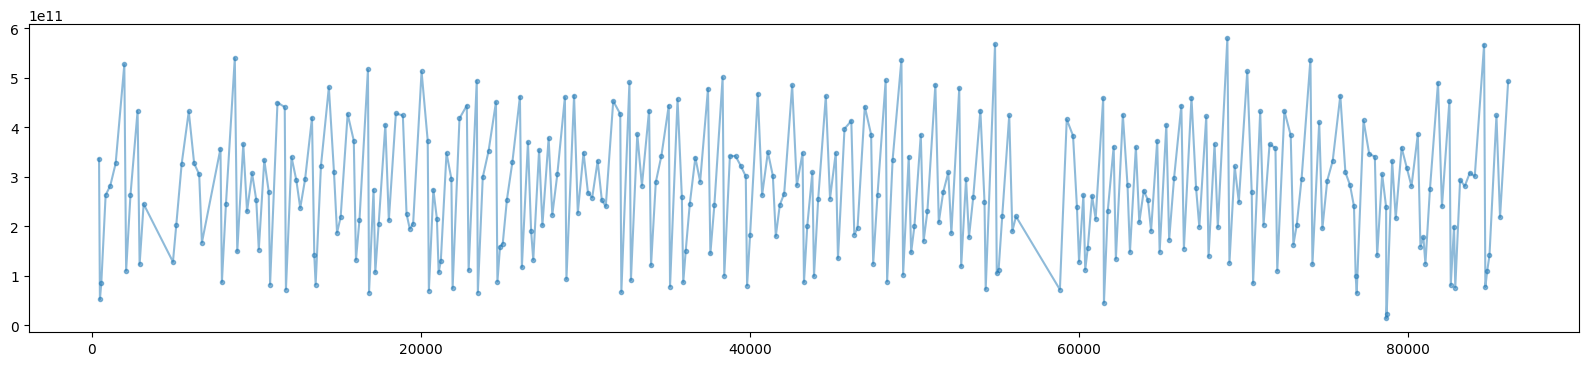

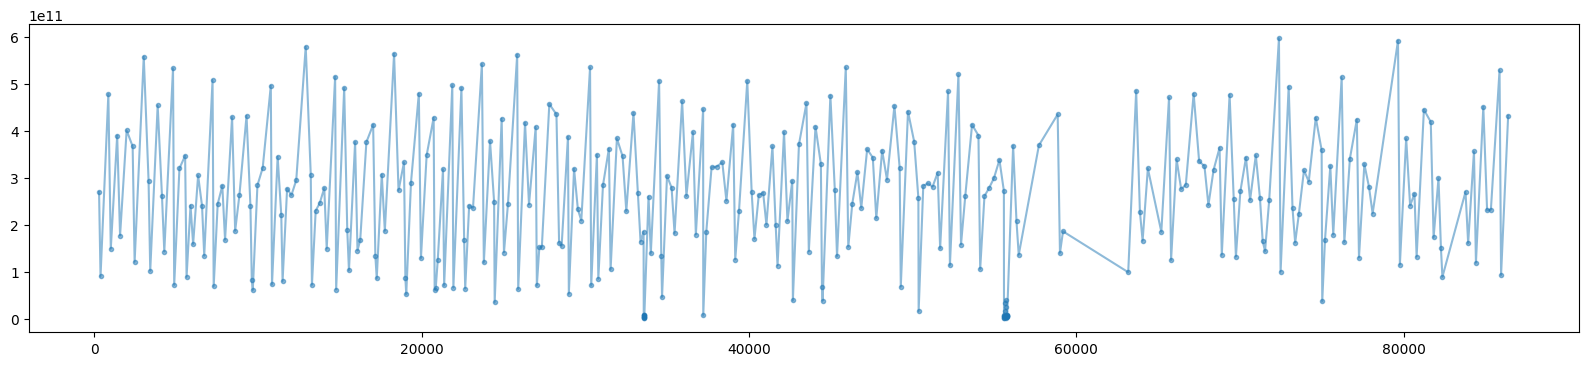

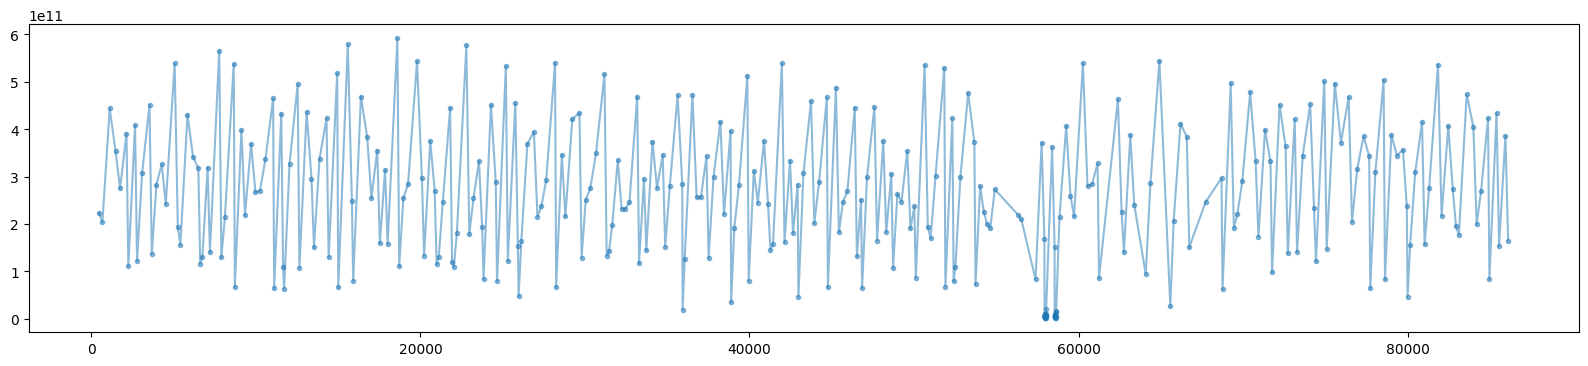

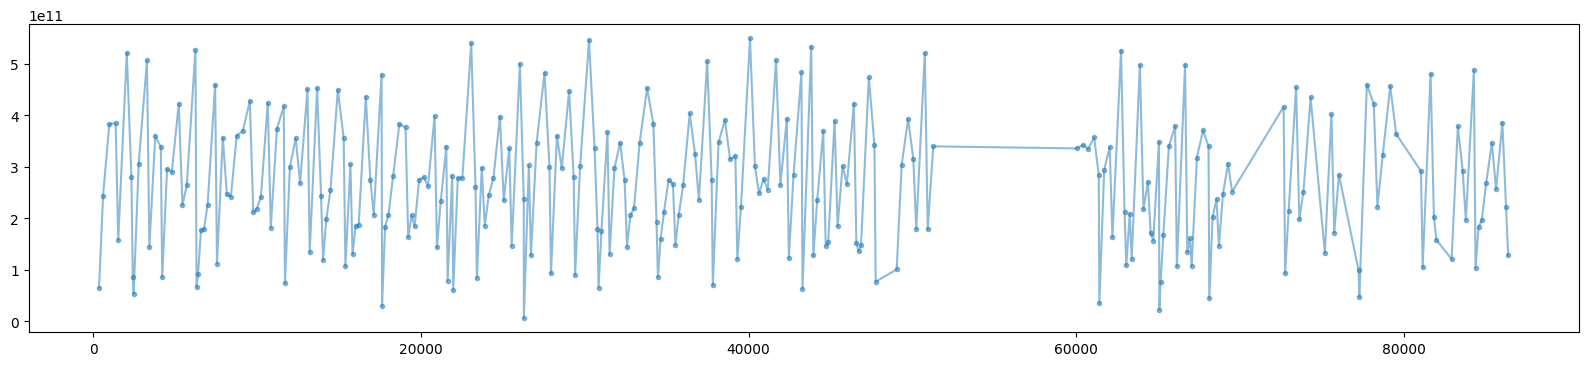

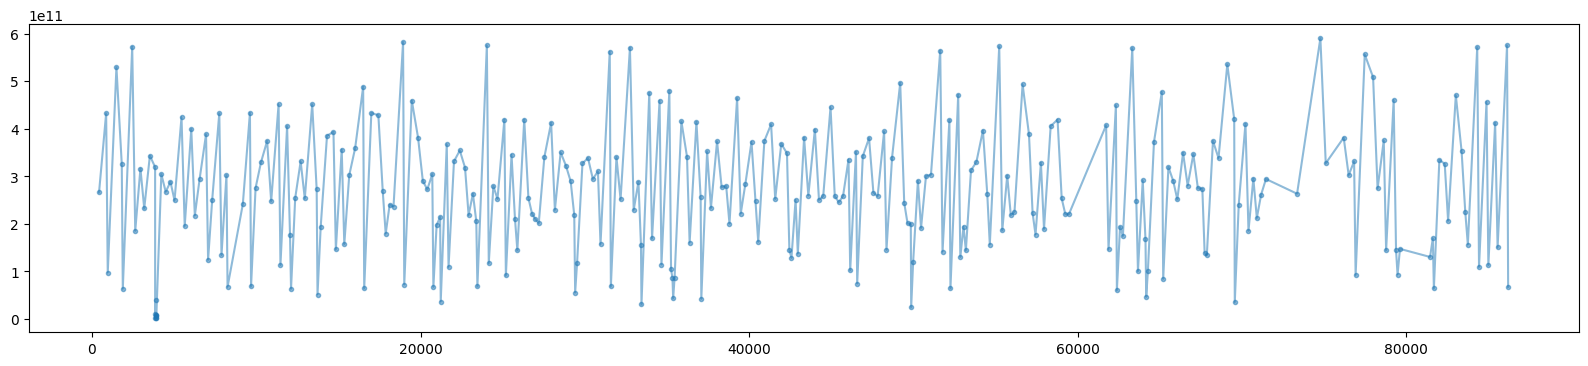

In [90]:
from datetime import timedelta
for d in range(5):
    plotDayIntervals(date(2021,8,10) + timedelta(days=d), appleHRDf, 600)

In [ ]:
# lets look at the first 10 minutes of 2024, 9, 12
# and try and generate varying levels of analysis

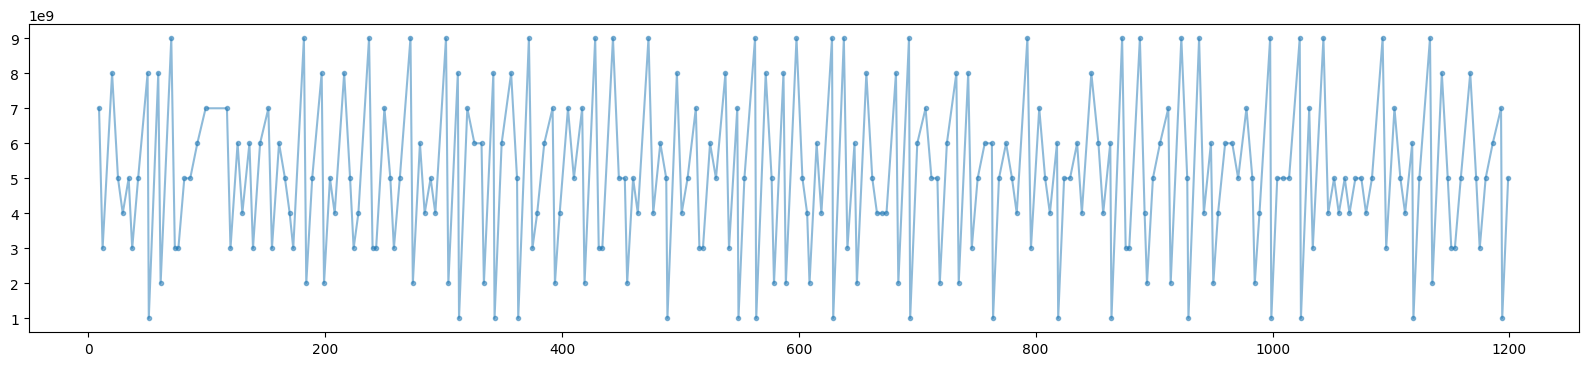

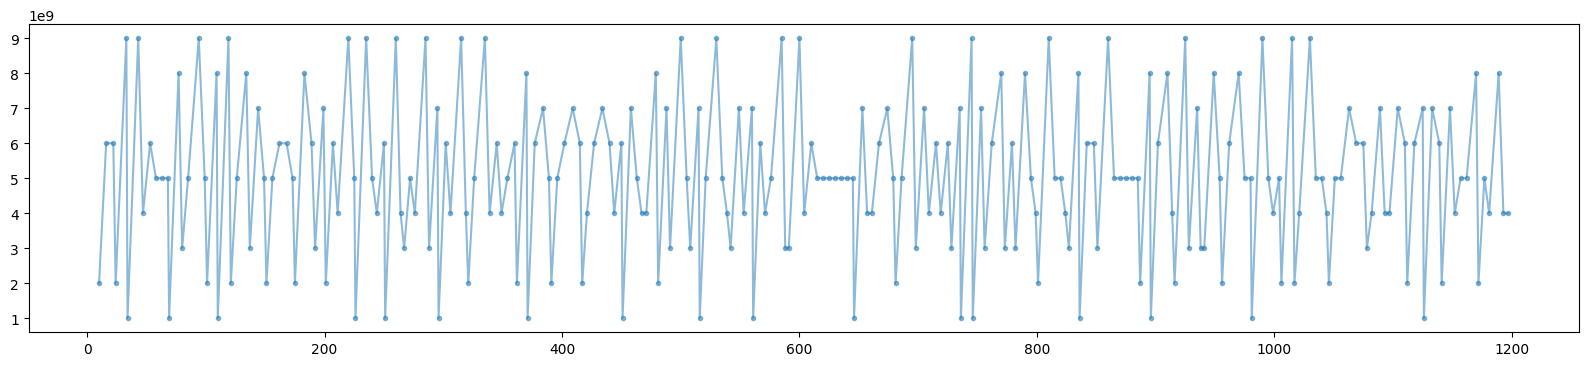

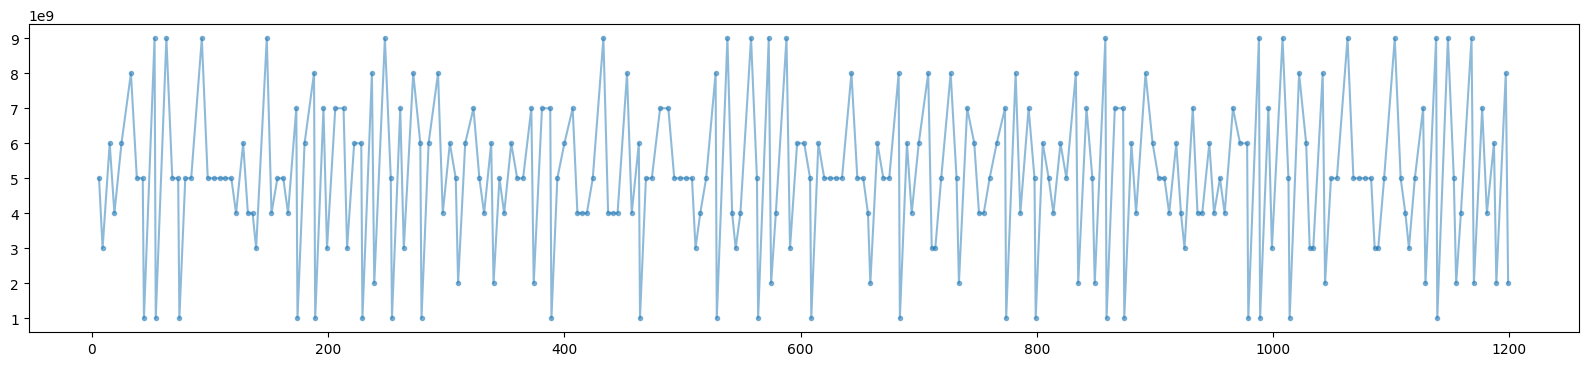

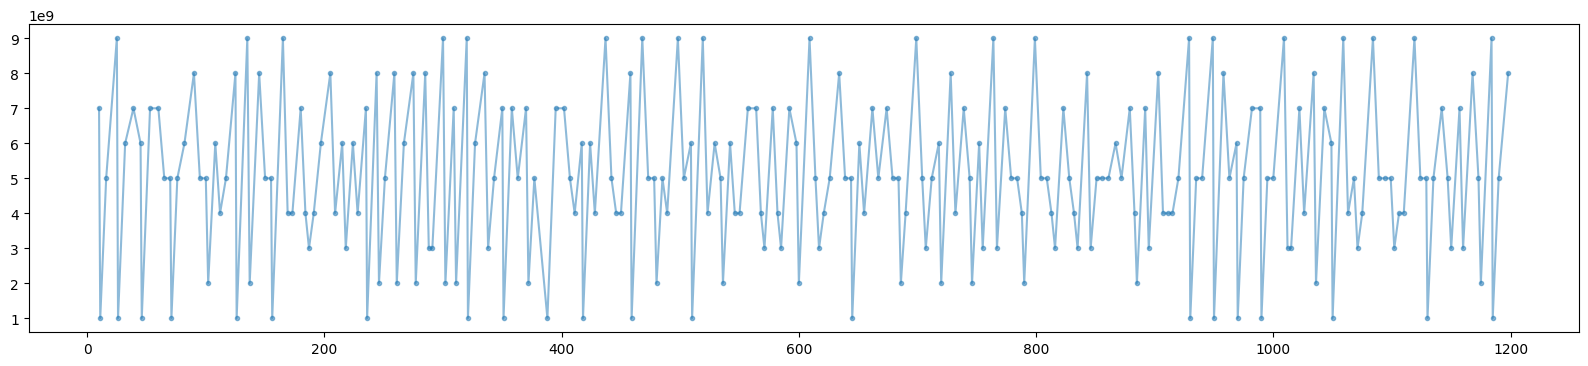

In [87]:
from datetime import timedelta
for d in range(5):
    plotDayIntervals(date(2024,9,10) + timedelta(days=d), appleHRDf, 9)

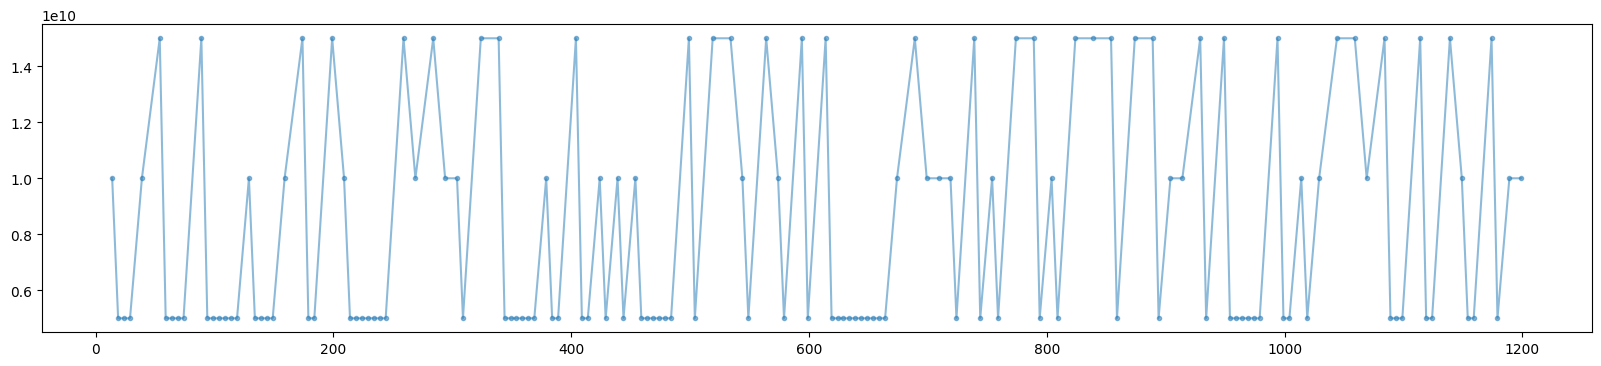

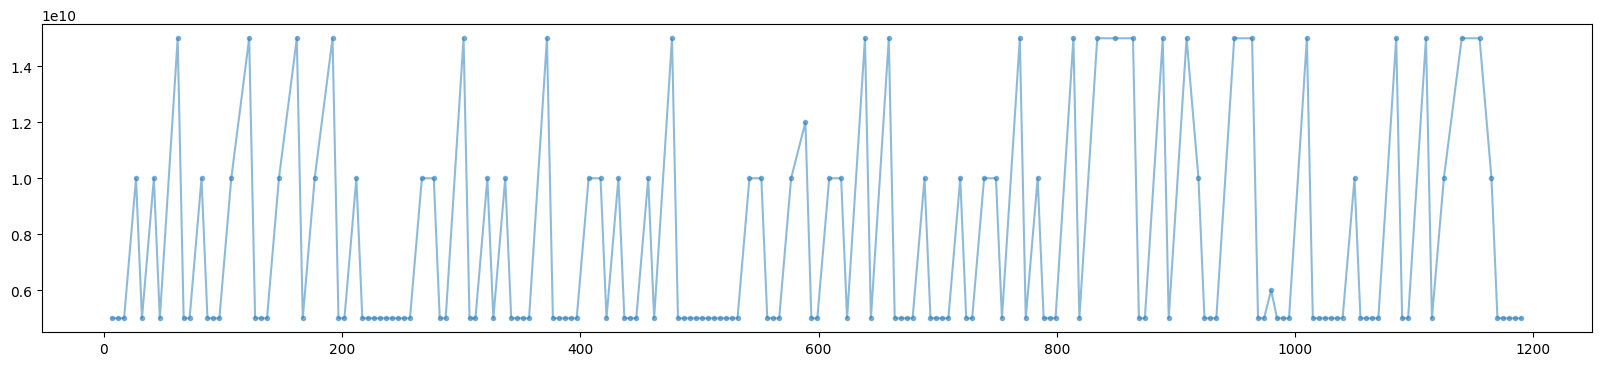

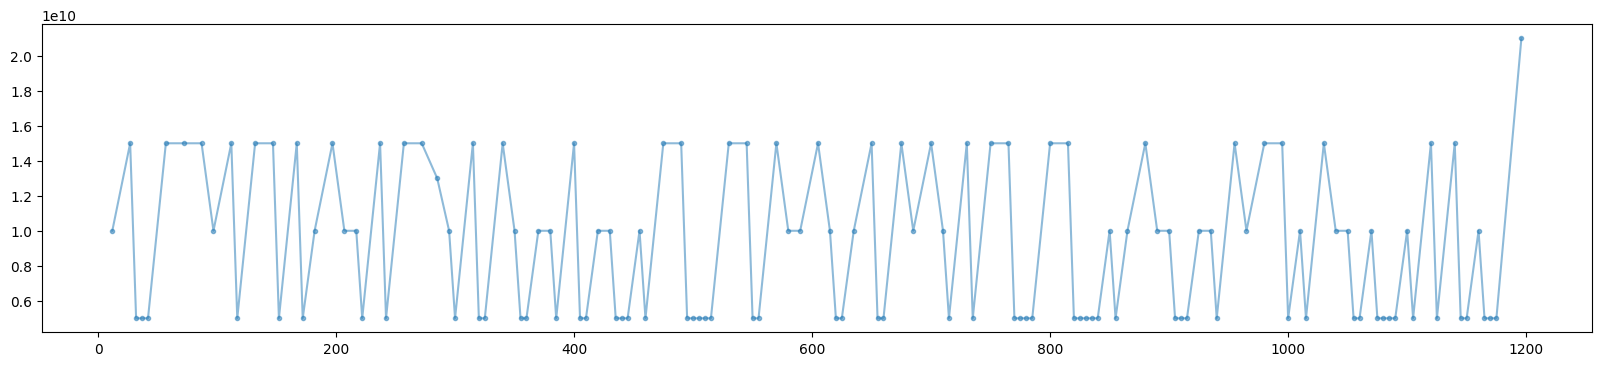

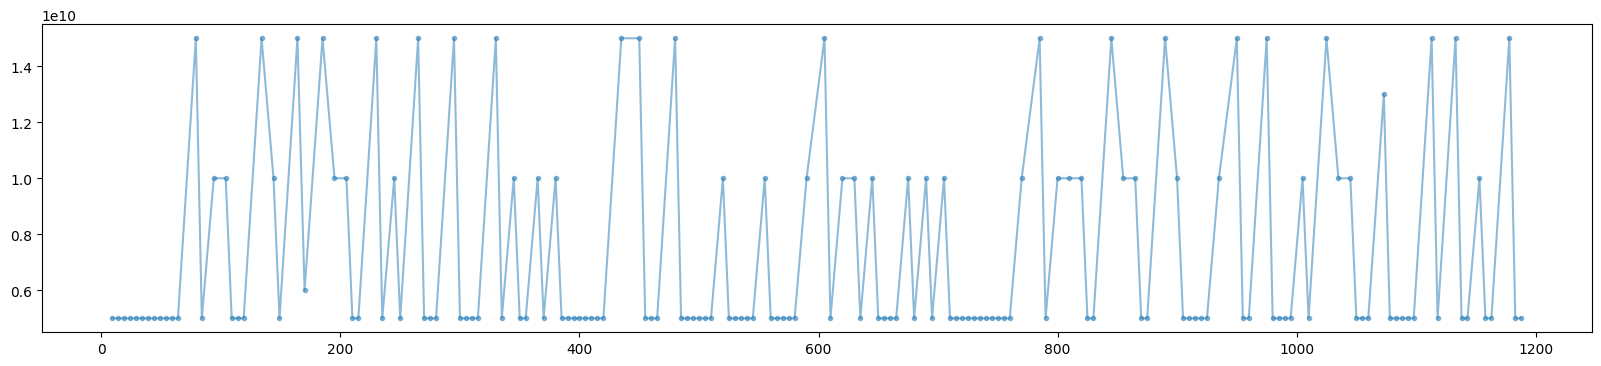

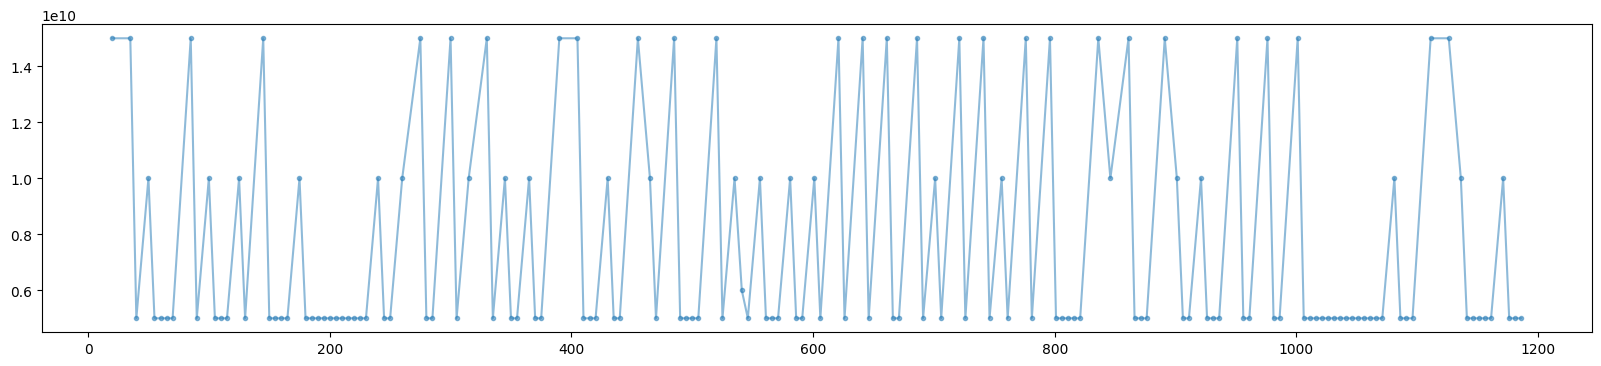

In [86]:
from datetime import timedelta
for d in range(5):
    plotDayIntervals(date(2024,9,10) + timedelta(days=d), fitbitHRDf, 21)

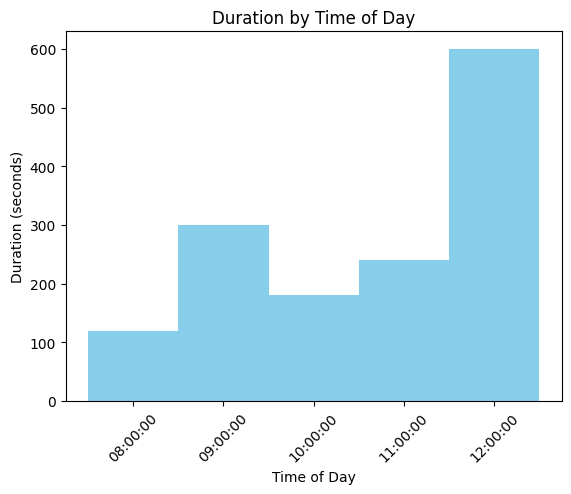

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with datetime.time as index
data = {'duration': [120, 300, 180, 240, 600]}
index = pd.date_range('2023-10-02 08:00', periods=5, freq='H')
df = pd.DataFrame(data, index=index)

# Convert the DatetimeIndex to just the time part
df['time'] = df.index.time

# Convert the time to string for plotting
df['time_str'] = df['time'].astype(str)

# Create a bar graph with time as string labels
plt.bar(df['time_str'], df['duration'], color='skyblue', width=1)

plt.xlabel('Time of Day')
plt.ylabel('Duration (seconds)')
plt.title('Duration by Time of Day')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()